<a href="https://colab.research.google.com/github/Yash2004Codes/PDS_PROJECT/blob/main/PDS_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
#tring random forest
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Load the dataset
data = pd.read_csv("StudentPerformanceFactors.csv")

#droping unncessary features
df = pd.DataFrame(data)

#df = df.drop(columns=['Gender'])
#print(df.head())

#CONVERTING categorical features to numerical values
level_mapping = {'Low': 1, 'Medium': 2, 'High': 3} #5 columns
distance_mapping ={'Near':1,'Moderate':2,'Far':3}
peers_mapping ={'Negative':-1,'Neutral':0,'Positive':1}
education_mapping ={'High School':1,'College':2,'Postgraduate':3}
disability ={'Yes':1,'No':0}
internet_access={'Yes':1,'No':0}
school_type={'Private':1,'Public':0}
extra_curricular={'Yes':1,'No':0}


# Specify the columns to encode
columns_to_encode1 = ['Parental_Involvement', 'Access_to_Resources',
'Motivation_Level','Teacher_Quality','Family_Income']
columns_to_encode2 =['Parental_Education_Level']
columns_to_encode3 =['Distance_from_Home']
columns_to_encode4 =['Peer_Influence']
columns_to_encode5 =['Learning_Disabilities']
columns_to_encode6 =['School_Type']
columns_to_encode7 =['Internet_Access']
columns_to_encode8 =['Extracurricular_Activities']

for col in columns_to_encode1:
    df[col] = df[col].map(level_mapping)

for col in columns_to_encode2:
    df[col] = df[col].map(education_mapping)

for col in columns_to_encode3:
    df[col] = df[col].map(distance_mapping)

for col in columns_to_encode4:
    df[col] = df[col].map(peers_mapping)

for col in columns_to_encode5:
    df[col] = df[col].map(disability)

for col in columns_to_encode6:
    df[col] = df[col].map(school_type)

for col in columns_to_encode7:
    df[col] = df[col].map(internet_access)

for col in columns_to_encode8:
    df[col] = df[col].map(extra_curricular)


#print(df.head())

# Check for missing values in the dataset
missing_values = df.isnull().sum()
missing_values

# Fill missing values in categorical columns with the mode (most common value)
df['Teacher_Quality'].fillna(df['Teacher_Quality'].mode()[0], inplace=True)
df['Parental_Education_Level'].fillna(df['Parental_Education_Level'].mode()[0], inplace=True)
df['Distance_from_Home'].fillna(df['Distance_from_Home'].mode()[0], inplace=True)

# Verify if all missing values have been filled
missing_values_after_fill = df.isnull().sum()
missing_values_after_fill

print(df.isnull().sum())


Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64


<ipython-input-50-cd736b9f12ab>:73: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Teacher_Quality'].fillna(df['Teacher_Quality'].mode()[0], inplace=True)
<ipython-input-50-cd736b9f12ab>:74: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(va

<ipython-input-61-76bb6d63b28c>:79: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Teacher_Quality'].fillna(df['Teacher_Quality'].mode()[0], inplace=True)
<ipython-input-61-76bb6d63b28c>:80: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(va

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64


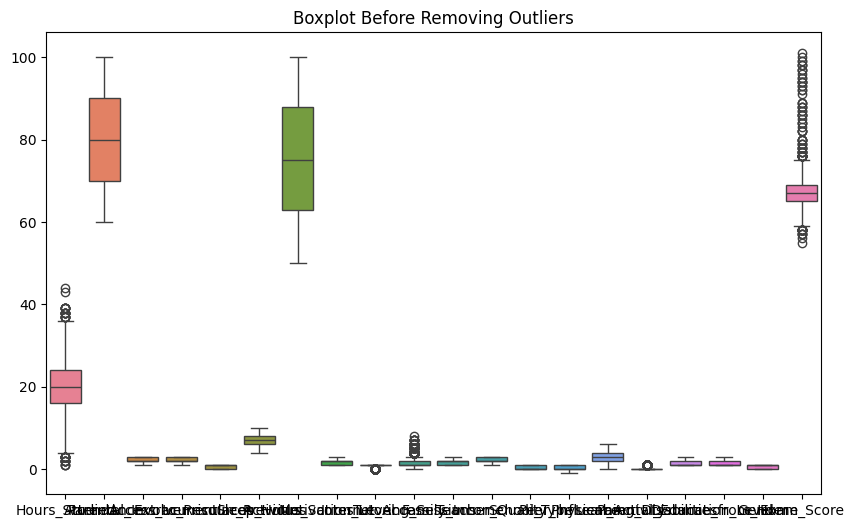

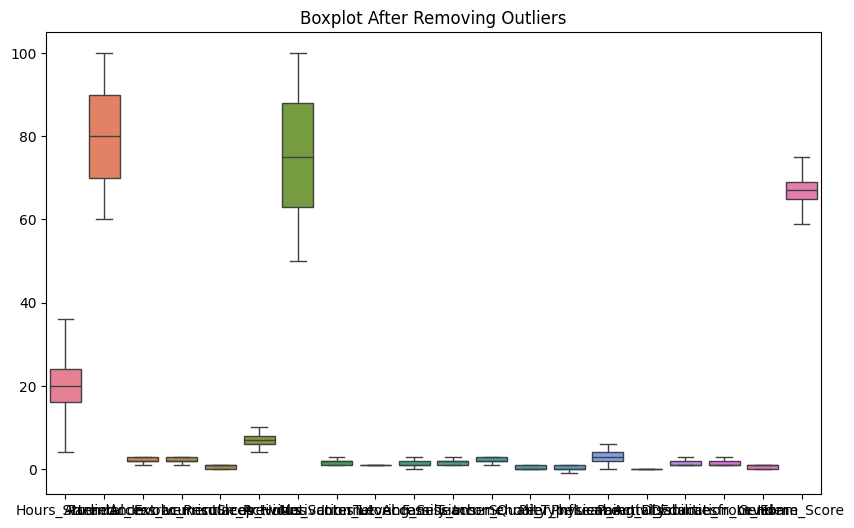

Mean Squared Error: 0.21386936693240233
R-squared Score: 0.7710262093508746
Mean Absolute Error: 0.11418464956046985


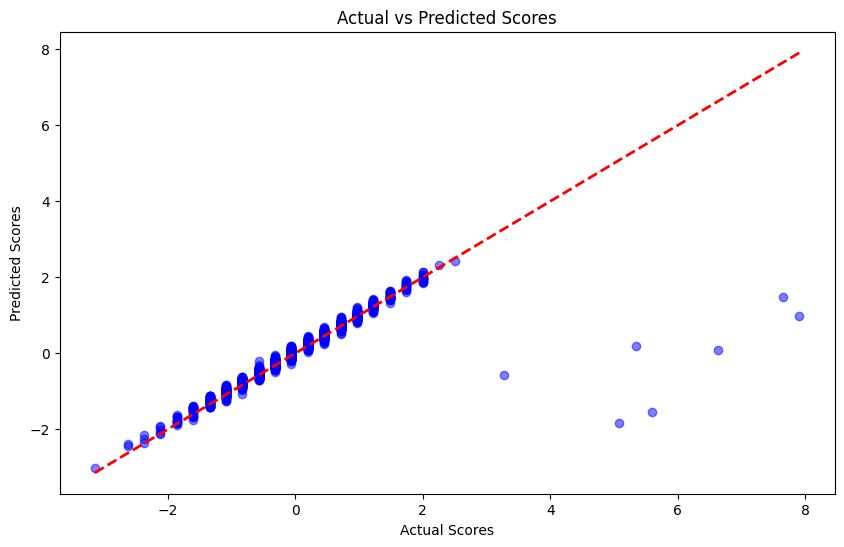

Feature Coefficients: [ 0.45006807  0.58961165  0.17862606  0.18707289  0.07190524 -0.00390902
  0.1809164   0.09187717  0.06388523  0.15983707  0.10195478  0.07945266
 -0.00094356  0.1003221   0.0495547  -0.06642661  0.09542295 -0.07882086
 -0.00225546]


In [61]:
#tring random forest
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso

# Load the dataset
data = pd.read_csv("StudentPerformanceFactors.csv")

#droping unncessary features
df = pd.DataFrame(data)

#df = df.drop(columns=['Gender'])
#print(df.head())

#CONVERTING categorical features to numerical values
level_mapping = {'Low': 1, 'Medium': 2, 'High': 3} #5 columns
distance_mapping ={'Near':1,'Moderate':2,'Far':3}
peers_mapping ={'Negative':-1,'Neutral':0,'Positive':1}
education_mapping ={'High School':1,'College':2,'Postgraduate':3}
disability ={'Yes':1,'No':0}
internet_access={'Yes':1,'No':0}
school_type={'Private':1,'Public':0}
extra_curricular={'Yes':1,'No':0}
Gender={'Male':1,'Female':0}

# Specify the columns to encode
columns_to_encode1 = ['Parental_Involvement', 'Access_to_Resources',
'Motivation_Level','Teacher_Quality','Family_Income']
columns_to_encode2 =['Parental_Education_Level']
columns_to_encode3 =['Distance_from_Home']
columns_to_encode4 =['Peer_Influence']
columns_to_encode5 =['Learning_Disabilities']
columns_to_encode6 =['School_Type']
columns_to_encode7 =['Internet_Access']
columns_to_encode8 =['Extracurricular_Activities']
columns_to_encode9 =['Gender']
for col in columns_to_encode1:
    df[col] = df[col].map(level_mapping)

for col in columns_to_encode2:
    df[col] = df[col].map(education_mapping)

for col in columns_to_encode3:
    df[col] = df[col].map(distance_mapping)

for col in columns_to_encode4:
    df[col] = df[col].map(peers_mapping)

for col in columns_to_encode5:
    df[col] = df[col].map(disability)

for col in columns_to_encode6:
    df[col] = df[col].map(school_type)

for col in columns_to_encode7:
    df[col] = df[col].map(internet_access)

for col in columns_to_encode8:
    df[col] = df[col].map(extra_curricular)

for col in columns_to_encode9:
    df[col] = df[col].map(Gender)

#print(df.head())

# Check for missing values in the dataset
missing_values = df.isnull().sum()
missing_values

# Fill missing values in categorical columns with the mode (most common value)
df['Teacher_Quality'].fillna(df['Teacher_Quality'].mode()[0], inplace=True)
df['Parental_Education_Level'].fillna(df['Parental_Education_Level'].mode()[0], inplace=True)
df['Distance_from_Home'].fillna(df['Distance_from_Home'].mode()[0], inplace=True)

# Verify if all missing values have been filled
missing_values_after_fill = df.isnull().sum()
missing_values_after_fill

print(df.isnull().sum())

#handling outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define outliers
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))

# Remove outliers
df_no_outliers = df[~outliers.any(axis=1)]

# Before removing outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title('Boxplot Before Removing Outliers')
plt.show()

# After removing outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_no_outliers)  # df_no_outliers is the data after removing outliers
plt.title('Boxplot After Removing Outliers')
plt.show()

from scipy.stats import zscore

# Calculate Z-scores for each feature
z_scores = zscore(df['Exam_Score'])



# Assuming 'df' is your fully numerical DataFrame
scaler = StandardScaler()

# Standardize the entire DataFrame
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
# Define your target variable (assuming 'Final_Score' is the target column)
X = df.drop(columns=['Exam_Score'])  # Features
y = df['Exam_Score']                 # Target variable

X_scaled = scaler.fit_transform(X) #scaling features
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor model
#model = LinearRegression()
#model = RandomForestRegressor(n_estimators=100, random_state=42)
model = Lasso(alpha=0.001)
#rfe = RFE(model, n_features_to_select=18)  # Choose the number of features to select
#X_rfe = rfe.fit_transform(X_train, y_train)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# 1. Prediction vs. Actual Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.title('Actual vs Predicted Scores')
plt.show()

# Feature Coefficients (to see which features have been selected/penalized)
print(f"Feature Coefficients: {model.coef_}")

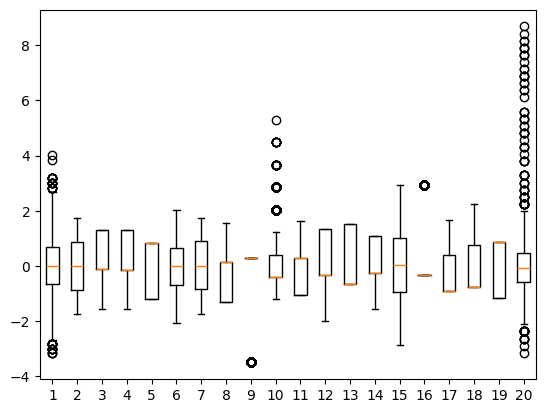

In [63]:
plt.boxplot(df)
plt.show()

In [45]:
#trying cross validation
from sklearn.model_selection import cross_val_score

# Perform cross-validation with Linear Regression
cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='r2')
print("Cross-Validation R2 scores:", cv_scores)
print("Mean R2 score from cross-validation:", cv_scores.mean())

Cross-Validation R2 scores: [0.62568188 0.7243014  0.7093919  0.73351067 0.84032765]
Mean R2 score from cross-validation: 0.7266426986505614


In [44]:
#checking for imp features
# Get the ranking of features
ranking = rfe.ranking_

# Get the list of selected features (those with rank 1)
selected_features = X.columns[rfe.support_]

# Get the list of all features along with their ranking
feature_ranking = pd.DataFrame({'Feature': X.columns, 'Ranking': ranking})
feature_ranking = feature_ranking.sort_values(by='Ranking')  # Sort by ranking (lower is better)

# Print the feature rankings
print("Feature Ranking:")
print(feature_ranking)

# Optionally, you can print the selected features directly
print("\nMost Important Features (Rank 1):")
print(selected_features)

Feature Ranking:
                       Feature  Ranking
0                Hours_Studied        1
15       Learning_Disabilities        1
14           Physical_Activity        1
13              Peer_Influence        1
12                 School_Type        1
11             Teacher_Quality        1
10               Family_Income        1
9            Tutoring_Sessions        1
8              Internet_Access        1
7             Motivation_Level        1
6              Previous_Scores        1
5                  Sleep_Hours        1
4   Extracurricular_Activities        1
3          Access_to_Resources        1
2         Parental_Involvement        1
1                   Attendance        1
16    Parental_Education_Level        1
17          Distance_from_Home        1

Most Important Features (Rank 1):
Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Inte

   Hours_Studied  Attendance  Parental_Involvement  Access_to_Resources  \
0       0.504942    0.348375             -1.562146             1.288574   
1      -0.162822   -1.383736             -1.562146            -0.143488   
2       0.671882    1.560853             -0.124267            -0.143488   
3       1.506587    0.781403             -1.562146            -0.143488   
4      -0.162822    1.041220             -0.124267            -0.143488   

   Extracurricular_Activities  Sleep_Hours  Previous_Scores  Motivation_Level  \
0                   -1.214685    -0.019796        -0.143800         -1.302866   
1                   -1.214685     0.661399        -1.116110         -1.302866   
2                    0.823259    -0.019796         1.106313          0.134442   
3                    0.823259     0.661399         1.592469          0.134442   
4                    0.823259    -0.700990        -0.699406          0.134442   

   Internet_Access  Tutoring_Sessions  Family_Income  Teacher_

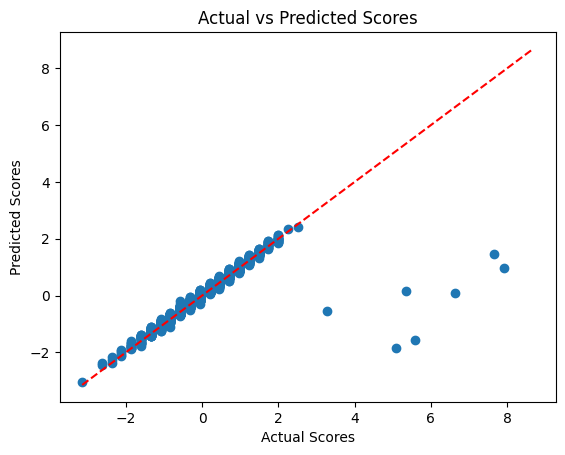

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE

# Convert the data to a DataFrame
df = pd.DataFrame(data)
# Define the mapping
level_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
#education_mapping ={'High School':1,'College':2,'Postgraduate':3}
distance_mapping ={'Near':1,'Moderate':2,'Far':3}
peers_mapping ={'Negative':-1,'Neutral':0,'Positive':1}

# Specify the columns to encode
columns_to_encode = ['Parental_Involvement', 'Access_to_Resources',
'Motivation_Level','Teacher_Quality']
#columns_to_encode2 =['Parental_Education_Level']
columns_to_encode3 =['Distance_from_Home']
columns_to_encode4 =['Peer_Influence']


#label or level encoding
# Apply the mapping to each column in columns_to_encode
for col in columns_to_encode:
    df[col] = df[col].map(level_mapping)

# Automatically find columns with only two unique values
binary_columns = [col for col in df.columns if df[col].nunique() == 2]

#binary encoding
#Apply binary encoding (0 and 1) to those columns
for col in binary_columns:
    df[col] = df[col].map({df[col].unique()[0]: 0, df[col].unique()[1]: 1})

for col in columns_to_encode2:
    df[col] = df[col].map(education_mapping)

for col in columns_to_encode3:
    df[col] = df[col].map(distance_mapping)

for col in columns_to_encode4:
    df[col] = df[col].map(peers_mapping)



# Assuming 'df' is your fully numerical DataFrame
scaler = StandardScaler()

# Standardize the entire DataFrame
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

print(df.head())

# Define features (X) and target (y)
X = df.drop('Exam_Score', axis=1)  # All columns except 'Target'
y = df['Exam_Score']  # The target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the resulting datasets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

#training model
model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')


plt.scatter(y_test, y_pred)
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.title('Actual vs Predicted Scores')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')  # line of perfect prediction
plt.show()

In [ ]:
#pds project

import pandas as pd

# Load the dataset
data = pd.read_csv("StudentPerformanceFactors.csv")

# Display the first few rows of the dataset to understand its structure
data.head()

# Check for missing values in the dataset
missing_values = data.isnull().sum()
missing_values


# Fill missing values in categorical columns with the mode (most common value)
data['Teacher_Quality'].fillna(data['Teacher_Quality'].mode()[0], inplace=True)
data['Parental_Education_Level'].fillna(data['Parental_Education_Level'].mode()[0], inplace=True)
data['Distance_from_Home'].fillna(data['Distance_from_Home'].mode()[0], inplace=True)

# Verify if all missing values have been filled
missing_values_after_fill = data.isnull().sum()
missing_values_after_fill


<ipython-input-4-f2402e6623db>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Teacher_Quality'].fillna(data['Teacher_Quality'].mode()[0], inplace=True)
<ipython-input-4-f2402e6623db>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("StudentPerformanceFactors.csv")

# Drop the specified columns by name
data = data.drop(columns=['Gender', 'Extracurricular_Activities', 'Family_Income', 'Parental_Education_Level', 'Physical_Activity'])


# Define the mapping
level_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
#education_mapping ={'High School':1,'College':2,'Postgraduate':3}
distance_mapping ={'Near':1,'Moderate':2,'Far':3}
peers_mapping ={'Negative':-1,'Neutral':0,'Positive':1}

# Specify the columns to encode
columns_to_encode = ['Parental_Involvement', 'Access_to_Resources',
'Motivation_Level','Teacher_Quality']
#columns_to_encode2 =['Parental_Education_Level']
columns_to_encode3 =['Distance_from_Home']
columns_to_encode4 =['Peer_Influence']


#label or level encoding
# Apply the mapping to each column in columns_to_encode
for col in columns_to_encode:
    df[col] = df[col].map(level_mapping)

# Automatically find columns with only two unique values
binary_columns = [col for col in df.columns if df[col].nunique() == 2]

#binary encoding
#Apply binary encoding (0 and 1) to those columns
for col in binary_columns:
    df[col] = df[col].map({df[col].unique()[0]: 0, df[col].unique()[1]: 1})

for col in columns_to_encode3:
    df[col] = df[col].map(distance_mapping)

for col in columns_to_encode4:
    df[col] = df[col].map(peers_mapping)


# Check for missing values in the dataset
missing_values = data.isnull().sum()

# Display missing values
print("Missing values before handling:")
print(missing_values)

# Handling missing values
# Identify numerical and categorical columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Impute missing values for numerical columns
for col in numerical_cols:
    if data[col].isnull().sum() > 0:  # Check if there are missing values
        if data[col].skew() > 1 or data[col].skew() < -1:  # Check for skewness
            # If skewed, use median
            data[col].fillna(data[col].median(), inplace=True)
        else:
            # Otherwise, use mean
            data[col].fillna(data[col].mean(), inplace=True)

# Impute missing values for categorical columns
for col in categorical_cols:
    if data[col].isnull().sum() > 0:  # Check if there are missing values
        data[col].fillna(data[col].mode()[0], inplace=True)  # Fill with mode

# Save the updated DataFrame back to a CSV file
data.to_csv('your_file_updated.csv', index=False)

# Check for missing values again to confirm handling
missing_values_after = data.isnull().sum()
print("\nMissing values after handling:")
print(missing_values_after)

# Proceed with the rest of your analysis
# Split the dataset into features and target variable
X = data.drop(columns=['Exam_Score'])
y = data['Exam_Score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Optionally, plot actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Exam Scores')
plt.ylabel('Predicted Exam Scores')
plt.title('Actual vs Predicted Exam Scores')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Diagonal line
plt.show()


Missing values before handling:
Hours_Studied             0
Attendance                0
Parental_Involvement      0
Access_to_Resources       0
Sleep_Hours               0
Previous_Scores           0
Motivation_Level          0
Internet_Access           0
Tutoring_Sessions         0
Teacher_Quality          78
School_Type               0
Peer_Influence            0
Learning_Disabilities     0
Distance_from_Home       67
Exam_Score                0
dtype: int64

Missing values after handling:
Hours_Studied            0
Attendance               0
Parental_Involvement     0
Access_to_Resources      0
Sleep_Hours              0
Previous_Scores          0
Motivation_Level         0
Internet_Access          0
Tutoring_Sessions        0
Teacher_Quality          0
School_Type              0
Peer_Influence           0
Learning_Disabilities    0
Distance_from_Home       0
Exam_Score               0
dtype: int64


<ipython-input-9-bf5bfcc339bf>:39: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)  # Fill with mode


ValueError: could not convert string to float: 'Low'